# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
print(cities)

['lompoc', 'khatanga', 'san patricio', 'chokurdakh', 'ilulissat', 'hilo', 'albany', 'yellowknife', 'rikitea', 'kodiak', 'ushuaia', 'busselton', 'oksfjord', 'beyneu', 'upernavik', 'mount isa', 'atar', 'morgan city', 'ponta do sol', 'bengkulu', 'sorong', 'atambua', 'bose', 'kapaa', 'marcona', 'mataura', 'clyde river', 'attawapiskat', 'punta arenas', 'hofn', 'qaanaaq', 'energetik', 'saint-philippe', 'san quintin', 'new norfolk', 'hirara', 'kavaratti', 'srivardhan', 'avarua', 'hamilton', 'castro', 'pevek', 'mys shmidta', 'torbay', 'ribeira grande', 'jamestown', 'barrow', 'nhlangano', 'olden', 'northam', 'norman wells', 'naze', 'antalaha', 'peleduy', 'dudinka', 'zalesovo', 'barcelos', 'zhigansk', 'georgetown', 'lasa', 'bredasdorp', 'hermanus', 'hami', 'saint anthony', 'whyalla', 'cape town', 'inyonga', 'portland', 'mwene-ditu', 'nagornskiy', 'grand river south east', 'waingapu', 'matamoros', 'esperance', 'tautira', 'bluff', 'zalukokoazhe', 'amderma', 'port hedland', 'tromso', 'kaitangata', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print(weather_api_key)

65e67b99df7e4d1a7b6d4e19ea6783d8


In [5]:
#establish base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#build query url
weather_url = base_url + "appid=" + weather_api_key + "&q=" 

#get sample weather of city
samp_weather = requests.get(weather_url + "fortuna").json()
samp_weather


{'coord': {'lon': -124.1573, 'lat': 40.5982},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 287.59,
  'feels_like': 287.24,
  'temp_min': 286.48,
  'temp_max': 288.15,
  'pressure': 1028,
  'humidity': 94},
 'visibility': 4828,
 'wind': {'speed': 2.06, 'deg': 310},
 'clouds': {'all': 90},
 'dt': 1610582985,
 'sys': {'type': 1,
  'id': 4127,
  'country': 'US',
  'sunrise': 1610552323,
  'sunset': 1610586708},
 'timezone': -28800,
 'id': 5563839,
 'name': 'Fortuna',
 'cod': 200}

In [6]:
#set lists
city_name = []
city_id = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

#loop through cities
for city in cities:
    
    #query
    city_data = requests.get(weather_url + city).json()
    
    try:
        city_name.append(city_data['name'])
        city_id.append(city_data["id"])
        latitude.append(city_data['coord']['lat'])
        longitude.append(city_data['coord']['lon'])
        temperature.append(city_data['main']['temp'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        
        print(f"{city},{city_data['id']} found! Appending stats")
        
    except:
        #append null
        print(f"{city} not found! NaN")
        pass

lompoc,5367788 found! Appending stats
khatanga,2022572 found! Appending stats
san patricio,4726521 found! Appending stats
chokurdakh,2126123 found! Appending stats
ilulissat,3423146 found! Appending stats
hilo,5855927 found! Appending stats
albany,5106841 found! Appending stats
yellowknife,6185377 found! Appending stats
rikitea,4030556 found! Appending stats
kodiak,5866583 found! Appending stats
ushuaia,3833367 found! Appending stats
busselton,2075265 found! Appending stats
oksfjord,778362 found! Appending stats
beyneu,610298 found! Appending stats
upernavik,3418910 found! Appending stats
mount isa,2065594 found! Appending stats
atar,2381334 found! Appending stats
morgan city,4333811 found! Appending stats
ponta do sol,2264557 found! Appending stats
bengkulu,1649150 found! Appending stats
sorong,1626542 found! Appending stats
atambua,1651103 found! Appending stats
bose,6457397 found! Appending stats
kapaa,5848280 found! Appending stats
marcona not found! NaN
mataura,6201424 found! Appe

camargo,4013724 found! Appending stats
nanortalik,3421765 found! Appending stats
longyearbyen,2729907 found! Appending stats
san policarpo,1688696 found! Appending stats
ancud,3899695 found! Appending stats
along,1278969 found! Appending stats
fortuna,5563839 found! Appending stats
kaabong,233093 found! Appending stats
samusu not found! NaN
alexandria,361058 found! Appending stats
longlac not found! NaN
manzhouli,2035836 found! Appending stats
filingue,2444995 found! Appending stats
araouane,2460954 found! Appending stats
verkhoyansk,2013465 found! Appending stats
bilibino,2126682 found! Appending stats
altea,2521804 found! Appending stats
sun valley,5513307 found! Appending stats
lorengau,2092164 found! Appending stats
bagamoyo,161290 found! Appending stats
carlsbad,5334223 found! Appending stats
maputo,1040652 found! Appending stats
nizhneyansk not found! NaN
cherskiy,2126199 found! Appending stats
pafos,146214 found! Appending stats
coihaique,3894426 found! Appending stats
severo-ku

galbshtadt,1497899 found! Appending stats
isangel,2136825 found! Appending stats
nichinan,1855476 found! Appending stats
zhaotong,1784841 found! Appending stats
fonte boa,6319315 found! Appending stats
sahrak not found! NaN
yeppoon,2142316 found! Appending stats
langenburg,2881128 found! Appending stats
itupiranga,3397851 found! Appending stats
xuanwu,1799962 found! Appending stats
ambalavao,1083968 found! Appending stats
yumen,1528998 found! Appending stats
volot,472328 found! Appending stats
camacha,2270385 found! Appending stats
taoudenni,2450173 found! Appending stats
tumannyy not found! NaN
saleaula not found! NaN
meulaboh,1214488 found! Appending stats
vondrozo,1053507 found! Appending stats
vallenar,3868633 found! Appending stats
minsk,625144 found! Appending stats
pacific grove,5380437 found! Appending stats
asyut,359783 found! Appending stats
rio gallegos,3838859 found! Appending stats
santa rosa,1687894 found! Appending stats
asau,686090 found! Appending stats
lashio,1314759 

In [7]:
#df
weather_data = pd.DataFrame({"City" : pd.Series(city_name),
            "City ID" : pd.Series(city_id),
            "Latitude" : pd.Series(latitude),
            "Longitude" : pd.Series(longitude),
            "temperature" : pd.Series(temperature),
            "humidity" : pd.Series(humidity),
            "cloudiness" : pd.Series(cloudiness),
            "wind speed" : pd.Series(wind_speed)
            })

weather_data 
        


,City,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Lompoc,5367788,34.6391,-120.4579,291.13,67,1,4.63
1,Khatanga,2022572,71.9667,102.5000,237.80,83,100,6.09
2,San Patricio,4726521,28.0170,-97.5169,283.48,76,75,4.12
3,Chokurdakh,2126123,70.6333,147.9167,238.00,84,63,2.53
4,Ilulissat,3423146,69.2167,-51.1000,269.15,80,90,6.69
...,...,...,...,...,...,...,...,...
575,Bad Waldsee,2953320,47.9167,9.7667,274.72,93,90,3.09
576,Erdőkertes,3053253,47.6726,19.3079,273.56,80,0,3.60
577,Lüderitz,3355672,-26.6481,15.1594,291.27,89,18,2.93
578,Potrero del Llano,3521207,21.0500,-97.6833,291.15,72,90,3.09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Save the updated dataframe as a csv
weather_data.to_csv("Resources/city_data.csv", encoding="utf-8", index=False)
weather_data.head()

,City,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Lompoc,5367788,34.6391,-120.4579,291.13,67,1,4.63
1,Khatanga,2022572,71.9667,102.5000,237.80,83,100,6.09
2,San Patricio,4726521,28.0170,-97.5169,283.48,76,75,4.12
3,Chokurdakh,2126123,70.6333,147.9167,238.00,84,63,2.53
4,Ilulissat,3423146,69.2167,-51.1000,269.15,80,90,6.69


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humidity_100 = weather_data.loc[weather_data["humidity"] <100]
humidity_100

,City,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Lompoc,5367788,34.6391,-120.4579,291.13,67,1,4.63
1,Khatanga,2022572,71.9667,102.5000,237.80,83,100,6.09
2,San Patricio,4726521,28.0170,-97.5169,283.48,76,75,4.12
3,Chokurdakh,2126123,70.6333,147.9167,238.00,84,63,2.53
4,Ilulissat,3423146,69.2167,-51.1000,269.15,80,90,6.69
...,...,...,...,...,...,...,...,...
575,Bad Waldsee,2953320,47.9167,9.7667,274.72,93,90,3.09
576,Erdőkertes,3053253,47.6726,19.3079,273.56,80,0,3.60
577,Lüderitz,3355672,-26.6481,15.1594,291.27,89,18,2.93
578,Potrero del Llano,3521207,21.0500,-97.6833,291.15,72,90,3.09


In [12]:
#  Get the indices of cities that have humidity over 100%.
#index = humidity_100.index
#index

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_data = weather_data.dropna[(weather_data["humidity"] != )]

In [14]:
humidity_100.dtypes

City            object
City ID          int64
Latitude       float64
Longitude      float64
temperature    float64
humidity         int64
cloudiness       int64
wind speed     float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

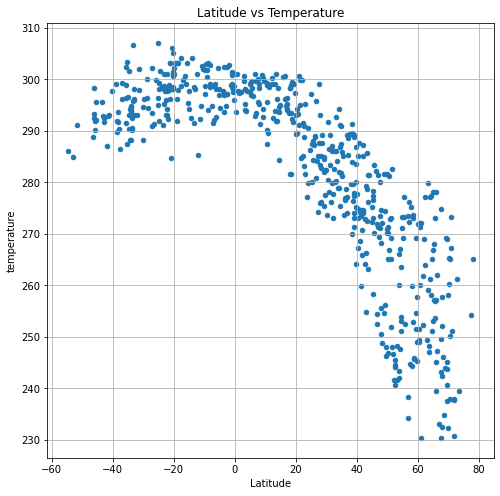

In [15]:
humidity_100.plot(kind="scatter", x="Latitude", y="temperature", grid=True, figsize=(8, 8),
                  title="Latitude vs Temperature")

plt.savefig("Resources/LatvsTemp.png")

## Latitude vs. Humidity Plot

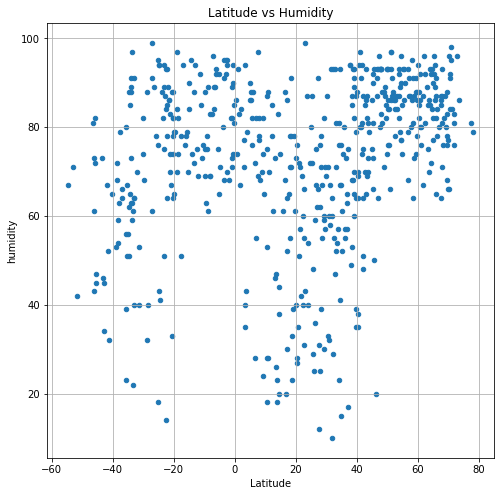

In [16]:
humidity_100.plot(kind="scatter", x="Latitude", y="humidity", grid=True, figsize=(8, 8),
                  title="Latitude vs Humidity")

plt.savefig("Resources/LatvsHumid.png")

## Latitude vs. Cloudiness Plot

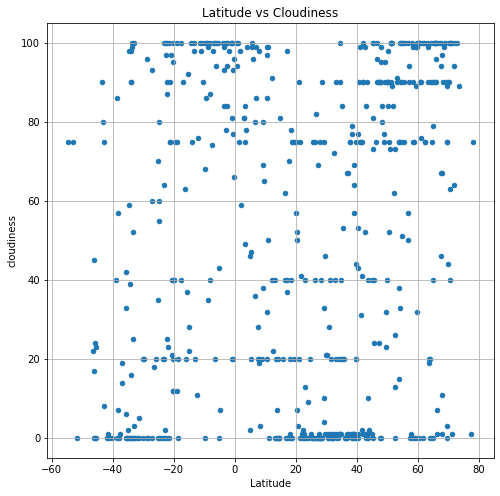

In [17]:
humidity_100.plot(kind="scatter", x="Latitude", y="cloudiness", grid=True, figsize=(8, 8),
                  title="Latitude vs Cloudiness")

plt.savefig("Resources/LatvsCloud.png")

## Latitude vs. Wind Speed Plot

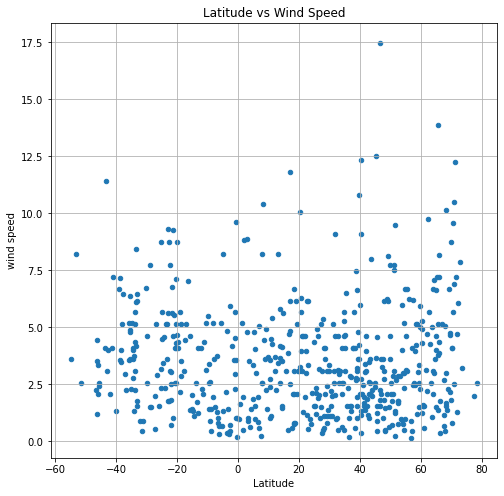

In [18]:
humidity_100.plot(kind="scatter", x="Latitude", y="wind speed", grid=True, figsize=(8, 8),
                  title="Latitude vs Wind Speed")

plt.savefig("Resources/LatvsWind.png")

## Linear Regression

In [19]:
north_hem = humidity_100.loc[humidity_100["Latitude"] >= 0]
south_hem = humidity_100.loc[humidity_100["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7049966964807683


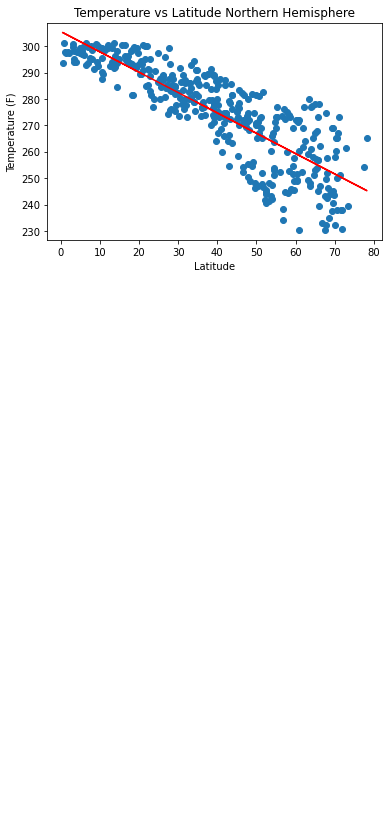

<Figure size 432x288 with 0 Axes>

In [20]:
# Add the linear regression equation and line to plot
x_values = north_hem['Latitude']
y_values = north_hem['temperature']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsTemp_LinReg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.18826471047039398


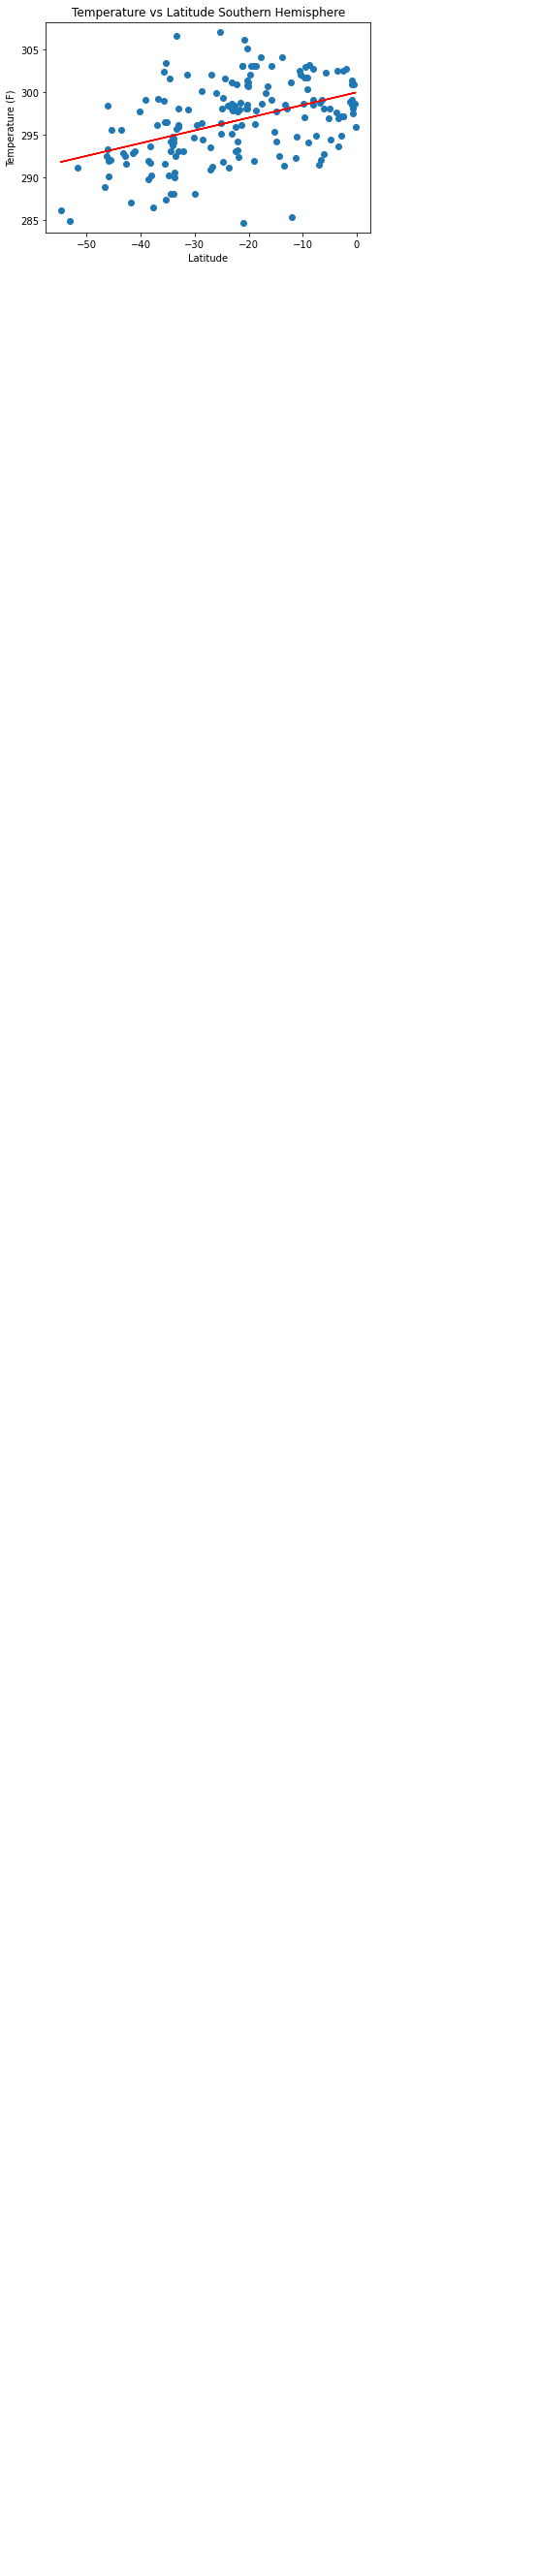

<Figure size 432x288 with 0 Axes>

In [21]:
# Add the linear regression equation and line to plot
x_values = south_hem['Latitude']
y_values = south_hem['temperature']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()


plt.savefig("Resources/South_LatvsTemp_LinReg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19041287518471864


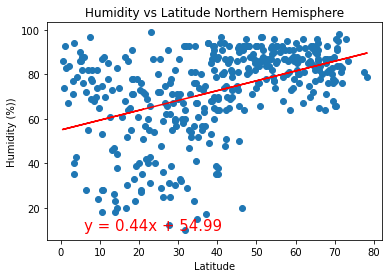

<Figure size 432x288 with 0 Axes>

In [22]:
# Add the linear regression equation and line to plot
x_values = north_hem['Latitude']
y_values = north_hem['humidity']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title('Humidity vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsHumid_LinReg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1986341663287285


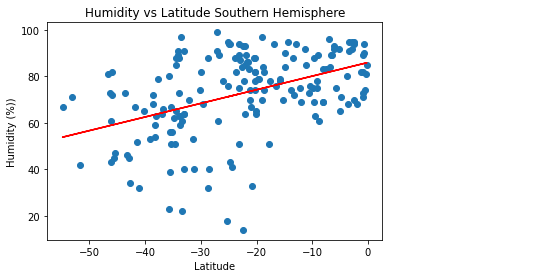

<Figure size 432x288 with 0 Axes>

In [23]:
# Add the linear regression equation and line to plot
x_values = south_hem['Latitude']
y_values = south_hem['humidity']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title('Humidity vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsHumid_LinReg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07665850295679152


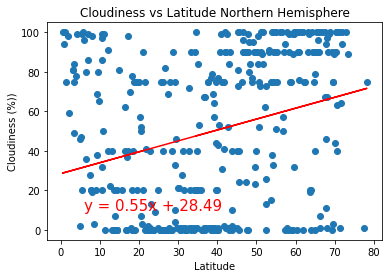

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = north_hem['Latitude']
y_values = north_hem['cloudiness']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title('Cloudiness vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsCloud_LinReg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21183753825869003


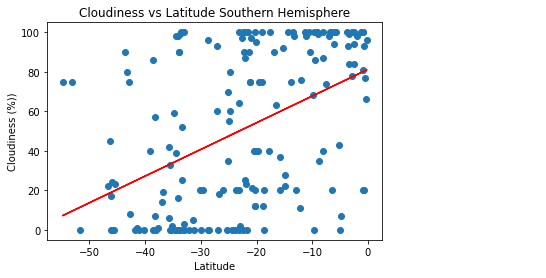

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = south_hem['Latitude']
y_values = south_hem['cloudiness']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title('Cloudiness vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsCloud_LinReg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01175915483595881


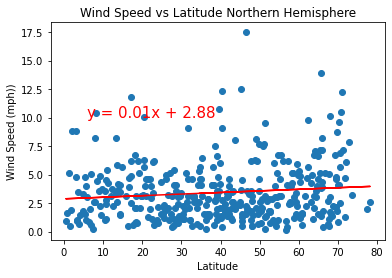

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = north_hem['Latitude']
y_values = north_hem['wind speed']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title('Wind Speed vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsWind_LinReg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.048870660149113246


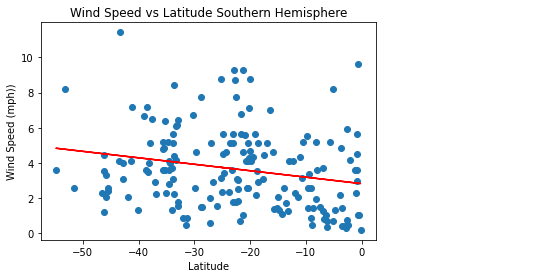

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = south_hem['Latitude']
y_values = south_hem['wind speed']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title('Wind Speed vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsWind_LinReg.png")